# Parcial 3
Sebastian García 201630047

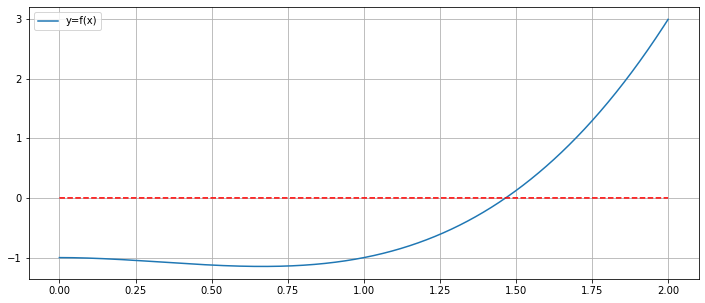

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Paso 1 -> Definir la función
f = lambda x: x**3 - x**2 - 1 # f(x) = x^3 - x^2 - 1

# Paso 2 -> Graficarla con el fin de hallar la intersección con el eje X
x = np.arange(0.0, 2.0, 0.001)
y = f(x)

plt.figure(figsize=(12,5))
plt.plot(x,y,label='y=f(x)')
plt.plot(x,[0 for i in y],'r--') # EJE X

plt.legend()
plt.grid(True)
plt.show()

[ 9.8  9.5  8.7  8.9 10.1 11.2 11.1  9.2  6.5  6.4  8.5 13.9]


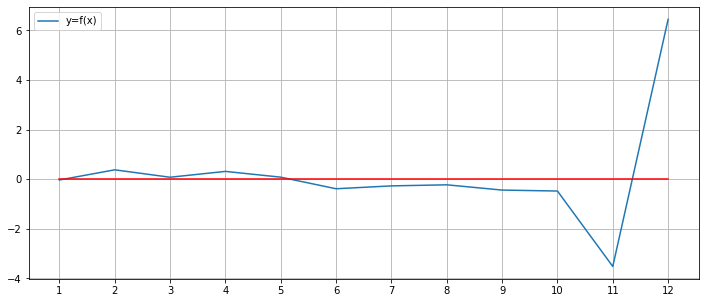

In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Paso 1 -> Definir la función
def f(x, i):
    return ((1/2) * (x ** (5/3))) + ( 3.0 * np.cos(0.2 * x) ) + ( np.exp(-0.5*x) ) - (i * np.cos(i)) - 20.8

# Paso 2 -> Graficarla con el fin de hallar la intersección con el eje X
x = np.array([9.8, 9.5, 8.7, 8.9, 10.1, 11.2, 11.1, 9.2, 6.5, 6.4, 8.5, 13.9]) #  np.random.uniform(low=1, high=15, size=(12,)) # 
i = np.arange(1, 13, 1) 

print(x)
y = f(x, i)

plt.figure(figsize=(12,5))
plt.plot(i,y,label='y=f(x)')
plt.plot(i,[0 for i in y],'r-') # EJE X
plt.xticks(np.arange(min(i), max(i)+1, 1.0))

plt.legend()
plt.grid(True)
plt.show()

In [28]:
# PUTNO 3

def regula_falsi(f, a, b, N=1000, tlr_x=1e-05, tlr_y=1e-05):    
    if f(a)*f(b) >= 0:
        print("False Position method fails (The sign of the function must change).")
        return None
    
    roots = []
    a_n = a
    b_n = b
    prev_root = b_n
    itr = 0
    
    for n in range(1, N+1):
        itr += 1
        m_n = b_n - ((f(b_n) * (b_n - a_n)) / (f(b_n) - f((a_n))) )
        f_m_n = f(m_n)
        roots.append(m_n)
        # Tolerancias 10**-5
        if np.abs(m_n - prev_root) <= tlr_x:
            break
        if np.abs(f_m_n) <= tlr_y:
            break
        
        if f(a_n) * f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n) * f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            return m_n, roots
        else:
            print("False Position method fails.")
            return None
        
        prev_root = m_n
       
    m_n = b_n - ((f(b_n) * (b_n - a_n)) / (f(b_n) - f((a_n))) )
    return m_n, roots, itr

In [36]:
# ejemplo mrk

# Paso 1 -> Definir la función
def f(x):
    return ((1/2) * (x ** (5/3))) + ( 3.0 * np.cos(0.2 * x) ) + ( np.exp(-0.5*x) ) - (6 * np.cos(6)) - 20.8
raiz, roots, itr = regula_falsi(f, 1.0, 15.0)
print(f'{raiz:0.8f} :: {itr}')

# Paso 1 -> Definir la función
def f9(x):
    return ((1/2) * (x ** (5/3))) + ( 3.0 * np.cos(0.2 * x) ) + ( np.exp(-0.5*x) ) - (9 * np.cos(9)) - 20.8
raiz9, roots, itr9 = regula_falsi(f9, 1.0, 15.0)
print(f'{raiz9:0.8f} :: {itr9}')

11.30376755 :: 9
6.68838271 :: 14


In [42]:

def secant(f, a, b, N=1000, tlr_x=1e-05, tlr_y=1e-05):
    itr = 0
    roots = []
    a_n = a
    b_n = b
    prev_root = b_n
    
    for n in range(1, N+1):
        itr +=1
        m_n = b_n - ((f(b_n) * (b_n - a_n)) / (f(b_n) - f((a_n))) )
        f_m_n = f(m_n)
        roots.append(m_n)
        
        # Tolerancias 10**-5
        if np.abs(m_n - prev_root) <= tlr_x:
            break
        if np.abs(f_m_n) <= tlr_y:
            break
        
        a_n = b_n
        b_n = m_n
        prev_root = m_n
        
    m_n = b_n - ((f(b_n) * (b_n - a_n)) / (f(b_n) - f((a_n))) )
    return m_n, roots, itr

In [46]:
# ejemplo mrk

f = lambda x: ((1/2) * (x ** (5/3))) + ( 3.0 * np.cos(0.2 * x) ) + ( np.exp(-0.5*x) ) - (9 * np.cos(9)) - 20.8
raiz, rootrs, itr = secant(f, 5.0, 4.9)
print(f'{raiz:0.8f} :: {itr}')

6.68838648 :: 4


In [69]:
##
import numpy as np

def gaussJordan(A, b):
    n = len(b)
    inv = np.linalg.inv(A)
    for k in range(n):
        # pivote parcial
        if np.fabs(A[k, k]) < 1.0e-12:
            for i in range(k+1, n):
                if np.fabs(A[i, k]) > np.fabs(A[k, k]):
                    for j in range(k, n):
                        A[k, j] , A[i, j] = A[i, j], A[k, j]
                    b[k] , b[i] = b[i], b[k]
                    break
        # division
        pivot = A[k, k]
        for j in range(k, n):
            A[k, j] /= pivot
        b[k] /= pivot
        # eliminacion
        for i in range(n):
            if i == k or A[i, k] == 0: continue
            factor = A[i, k]
            for j in range(k, n):
                A[i, j] -= factor * A[k, j]
            b[i] -= factor * b[k]
            
    return b, inv


In [1]:
##########################################################################################
# Correcion último punto
##########################################################################################

Mayor 6
Min 13
Estimado hora 11 77.07912482065997
Estimado hora 22 70.38522238163557


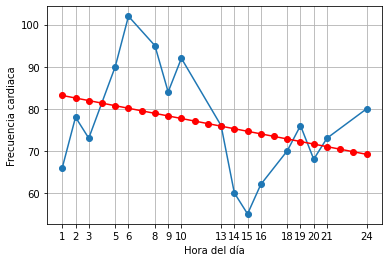

In [20]:
##
import struct
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

x_file_name = "DataX.bin"
y_file_name = "DataY.bin"

valores_x = []
valores_y = []

with open(x_file_name, 'rb') as f:
    x = f.read()
    valores_x = np.array(struct.unpack("H"*int(len(x)/2), x)) 
    
with open(y_file_name, 'rb') as f:
    y = f.read()
    valores_y = np.array(struct.unpack("H"*int(len(y)/2), y)) 
    
x_est = np.arange(1, 25)
pol = np.polyfit(valores_x, valores_y, 1)

y_est = np.polyval(pol, x_est)

##
plt.figure()
plt.plot(valores_x, valores_y, '-o')
plt.plot(x_est, y_est, '-or')
plt.xticks(valores_x)
plt.ylabel("Frecuencia cardiaca")
plt.xlabel("Hora del día")
plt.grid(1)

##
r_i = np.abs(valores_y - y_est[valores_x - 1])

##
rimax = np.argmax(r_i)
rimin = np.argmin(r_i)

print(f"Mayor {valores_x[rimax]}")
print(f"Min {valores_x[rimin]}")
print(f"Estimado hora 11 {y_est[10]}")
print(f"Estimado hora 22 {y_est[21]}")